# Random numbers and dimensionality

#### Setup

Import QL and the graphing module.

In [1]:
import matplotlib.pyplot as plt
from QuantLib import *

Also define a helper function to make the notebook less verbose.

In [2]:
def set_unit_square(ax):
    ax.axis('scaled')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

#### Covering a unit square

The dimensionality of the problem is 2. With pseudo-random numbers, it doesn't matter much: we can just extract numbers and form pairs from them.

In [3]:
rng = MersenneTwisterUniformRng(42)

In [4]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.next().value())
    ys.append(rng.next().value())

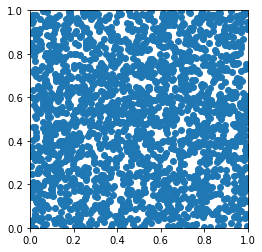

In [5]:
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs, ys, 'o')

The same doesn't hold for quasi-random numbers. Eeach number is correlated to the one that follows it, which ruins the random properties of the sequence when used with the wrong dimensionality.

In [6]:
rng = SobolRsg(1)

In [7]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.nextSequence().value()[0])
    ys.append(rng.nextSequence().value()[0])

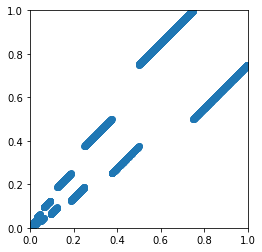

In [8]:
fix, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs, ys, 'o')

To cover the domain correctly, we have to use the right dimensionality.

In [9]:
rng = SobolRsg(2)

In [10]:
xs = []
ys = []
for i in range(2047):
    x,y = rng.nextSequence().value()
    xs.append(x)
    ys.append(y)

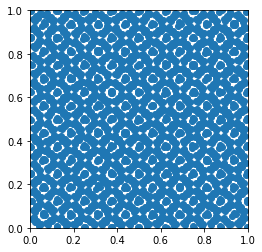

In [11]:
fig, ax = plt.subplots()
set_unit_square(ax)
g = ax.plot(xs, ys, 'o')

#### High dimensionality and quality of randomness

Quasi-random numbers with high dimensionality are known to have better randomness in the first components of the generated sequences and worst in the last ones.

This is not a problem with a low number of dimensions.

In [12]:
rng = SobolRsg(3)

In [13]:
xs = [ rng.nextSequence().value() for i in range(1023)]

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

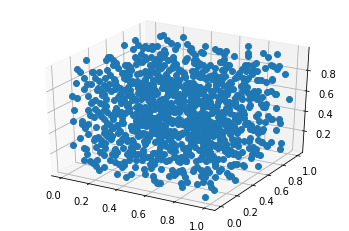

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X, Y, Z = zip(*xs)
g = ax.plot(X, Y, Z, 'o')

...which can be easier to see by looking at projections over planes...

In [17]:
def section(xs, i):
    return [x[i] for x in xs]

In [18]:
def project(ax, xs, i, j, title=None):
    set_unit_square(ax)
    ax.set_title(title or "(%d,%d)" % (i,j))
    ax.plot(section(xs,i), section(xs,j), 'o')

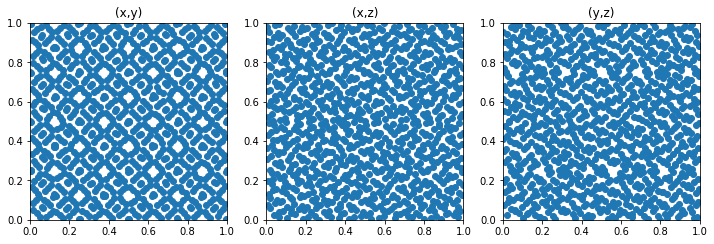

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

project(ax[0], xs, 0, 1, title="(x,y)")
project(ax[1], xs, 0, 2, title="(x,z)")
project(ax[2], xs, 1, 2, title="(y,z)")

...but with a high number of dimensions and not enough draws, it can cause some subspaces to be covered incorrectly.

In [20]:
seed = 242656
rng = SobolRsg(5000, seed)

In [22]:
xs = [ rng.nextSequence().value() for i in range(511)]

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))